# Invasion Percolation

A simple model of fluid forcing its way through a fractured medium (e.g., pollutants through rock).

1.  Fill NxN grid of cells with random integers in range 1..R.
2.  Mark center cell as "filled".
3.  Repeatedly:
    1.  Find lowest-valued neighbors on edge of filled region.
    2.  Select one of those neighbors at random.
        -   "At random" is important: first, last, or arbitrary introduces bias
    3.  Fill it.
4.  Until filled region reaches boundary of grid.

Our goals:

1.  Make it work.
2.  Make it right.
3.  Make it fast.

## Implementation

In [13]:
# Use NumPy array to store grid.

import numpy as np

In [14]:
# Develop top-down: write as if we already had the functions we need, then fill them in.

def percolation(size, spread):
    """
    Simulate invasion percolation on a size x size grid with values in [1..spread],
    reporting density of final filled shape.
    """
    
    # Setup.
    grid = make_grid(size, spread)
    middle = size // 2
    chosen = (middle, middle)
    fill(grid, chosen)
    
    # Simulate filling.
    while not on_boundary(grid, chosen):
        chosen = choose_next(grid)
        fill(grid, chosen)

    # Return results (so that caller can decide how to report or display).
    return grid, calculate_density(grid)

In [15]:
# Use 1..spread (inclusive) for values, and 0 to show filled cells.

def make_grid(size, spread):
    """
    Create size x size grid filled with values in [1..spread].
    """
    return np.random.randint(low=1, high=spread+1, size=(size, size))

In [16]:
# Mark filled cells with 0.

def fill(grid, loc):
    """
    Mark a cell as filled.
    """
    grid[loc] = 0

In [17]:
# Next easy function is test against boundary.

def on_boundary(grid, loc):
    """
    Is the specified cell on the boundary of the grid?
    """
    grid_x, grid_y = grid.shape
    loc_x, loc_y = loc
    return (loc_x == 0) or (loc_y == 0) or (loc_x == (grid_x -1)) or (loc_y == (grid_y -1))

In [18]:
# Calculating density is easy using built-in methods of NumPy arrays.

def calculate_density(grid):
    """
    Return proportion of cells that are filled.
    """
    filled = np.sum(grid == 0)
    return filled / grid.size

In [19]:
# This is the heart of the whole program.

# Discover while we're writing this function that we need Python's plain old random library.
import random

def choose_next(grid):
    """
    Find and return coordinates of next grid cell to fill.
    """
    candidates = []
    value = 1 + grid.max()
    dim_x, dim_y = grid.shape
    for x in range(dim_x):
        for y in range(dim_y):
            # Already filled.
            if grid[x, y] == 0:
                pass
            # Unfilled and adjacent.
            elif is_adjacent(grid, (x, y)):
                if grid[x, y] < value:
                    value = grid[x, y]
                    candidates = [(x, y)]
                elif grid[x, y] == value:
                    candidates.append((x, y))
            # Fall through and do nothing if unfilled and not adjacent.
    
    # Choose a list element at random.
    return random.choice(candidates)

In [20]:
# Helper function: could write this inline in choose_next, but that function is already hard to read.

def is_adjacent(grid, loc):
    """
    Is the location (x, y) adjacent to a filled cell?
    """
    x, y = loc
    max_x, max_y = grid.shape
    if (x > 0) and (grid[x-1, y] == 0):
        return True
    if (y > 0) and (grid[x, y-1] == 0):
        return True
    if (x < max_x-1) and (grid[x+1, y] == 0):
        return True
    if (y < max_y-1) and (grid[x, y+1] == 0):
        return True
    return False

## Simple Test

In [21]:
grid, density = percolation(5, 5)
print(grid)
print(density)

[[1 3 5 4 3]
 [1 4 4 3 5]
 [2 3 0 2 2]
 [0 0 0 4 2]
 [3 3 5 1 1]]
0.16


## Visualization

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

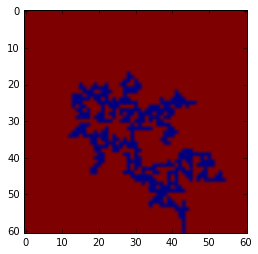

In [24]:
grid, density = percolation(61, 20)
grid[grid>0] = 1
plt.imshow(grid)